# Sai Teja Karnati 

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import time
import math


def gradDesc(alpha,w):    
    start = time.clock()    
    print("Gradient Descent method")
    print ("Initial point =>",w)
    print("Learning rate alpha => ",alpha)
    
    gradEnergy = []
    gradX=[]
    gradY=[]
    
    while ((w[0]+w[1])<1) and (w[0]>0) and (w[1]>0):
        energy = - math.log(1-w[0]-w[1]) - math.log(w[0]) - math.log(w[1])
        gradEnergy.append(energy)
        gradX.append(w[0])
        gradY.append(w[1])
        Xgrad = 1/(1-w[0]-w[1]) - 1/(w[0])
        Ygrad = 1/(1-w[0]-w[1]) - 1/(w[1])
        gradupdate = np.array([Xgrad, Ygrad])
        update = - alpha * gradupdate
        if np.linalg.norm(w - np.add(w,update)) < 0.0000000001:
            break
        else:
            w = np.add(w,update)
    end = time.clock()
    print(end-start)
    print()
    return gradX, gradY, gradEnergy

def newton(alpha,w):
    start = time.clock() 
    print("Newtons method")
    print ("Initial point =>",w)
    print("Learning rate alpha => ",alpha)
    newtonEnergy = []
    newtonXval = []
    newtonYval = []
    while ((w[0]+w[1])<1) and (w[0]>0) and (w[1]>0):
        energy = - math.log(1-w[0]-w[1]) - math.log(w[0]) - math.log(w[1])
        newtonEnergy.append(energy) 
        newtonXval.append(w[0])
        newtonYval.append(w[1])
        Xgrad = (2*w[0]+w[1]-1)/(w[0]*(1-w[0]-w[1]))
        Ygrad= (2*w[1]+w[0]-1)/(w[1]*(1-w[0]-w[1]))
        gradupdate = np.array([Xgrad, Ygrad])
        hessian11 = 1/((1-w[0]-w[1])*(1-w[0]-w[1])) + 1/(w[0]*w[0])
        hessian22 = 1/((1-w[0]-w[1])*(1-w[0]-w[1])) + 1/(w[1]*w[1])
        hessian = 1/(1- w[0]-w[1]) * (1- w[0]-w[1])
        hessianupdate = np.array([[hessian11, hessian],[hessian, hessian22]])

        update = -alpha * np.matmul(inv(hessianupdate), gradupdate)
        if np.linalg.norm(w - np.add(w,update)) < 0.0000000001:
            break
        else:
            w = np.add(w,update)
    end = time.clock()
    print(end-start)
    
    return newtonXval, newtonYval, newtonEnergy


def plotX_Yval(gradX, gradY, newtonX, newtonY):
    plt.subplot(1, 2, 1)
    plt.scatter(gradX, gradY)
    plt.xlabel("Xval-Gradient Descent",fontsize=14)
    plt.ylabel("Y-Values")

    plt.subplot(1, 2, 2)
    plt.scatter(newtonX, newtonY)
    plt.xlabel("Xval-Newton's method",fontsize=14)
    plt.ylabel("Yval")

    plt.tight_layout(rect=[0, 0, 3, 2])
    plt.show()
    
def plotenergies(gradEnergies, newtonEnergies):
    plt.subplot(1, 2, 1)
    plt.scatter(range(len(gradEnergies)), gradEnergies)
    plt.xlabel('Iterations- Gradient Descent',fontsize=14)
    plt.ylabel(' Energies',fontsize=14)

    plt.subplot(1, 2, 2)
    plt.scatter(range(len(newtonEnergies)), newtonEnergies)
    plt.xlabel("Iterations-Newton's method",fontsize=14)
    plt.ylabel('Energies',fontsize=14)

    plt.tight_layout(rect=[0, 0, 3, 2])
    plt.show()

Gradient Descent method
Initial point => [0.3  0.65]
Learning rate alpha =>  0.01
0.004405199993925635

Newtons method
Initial point => [0.3  0.65]
Learning rate alpha =>  1
0.002191100000345614


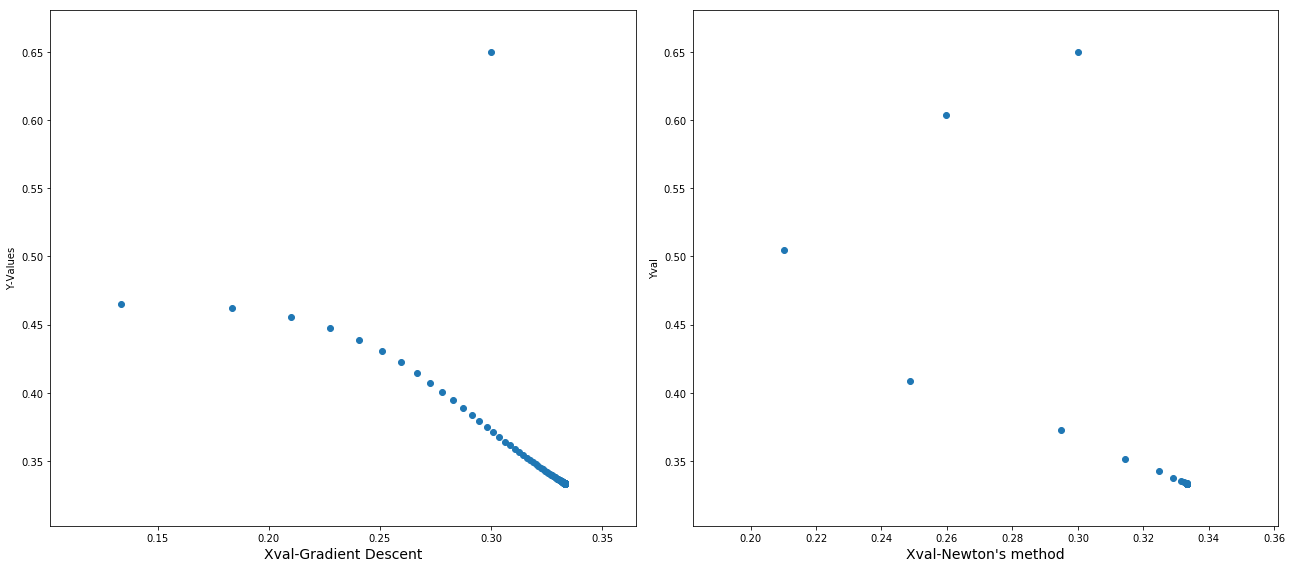

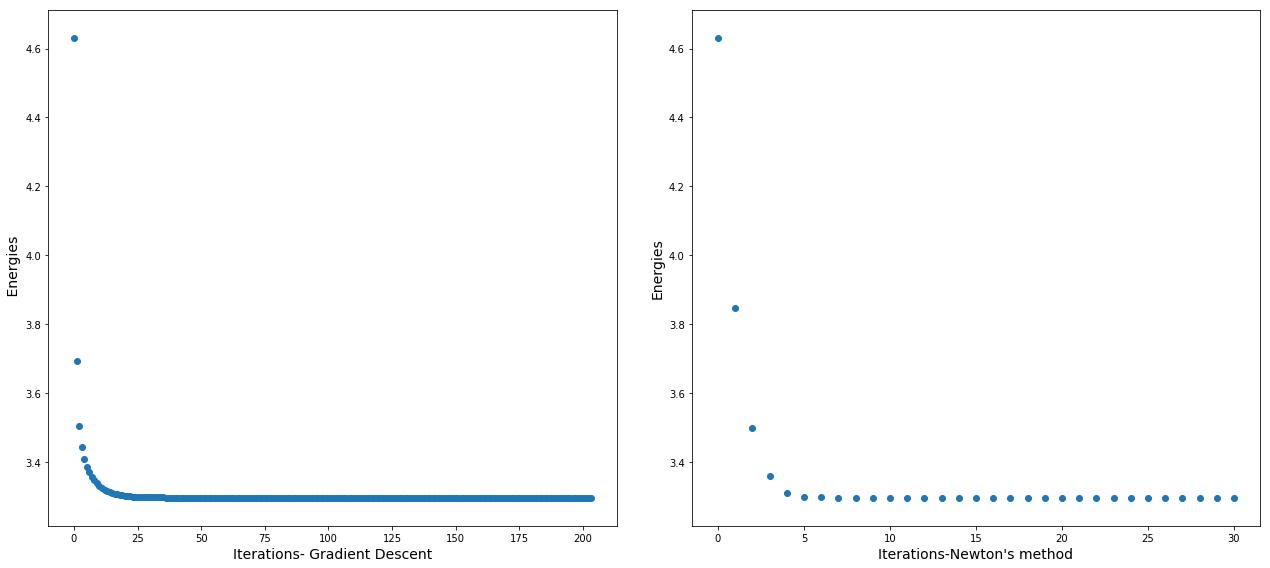

In [113]:
w = np.array([0.3,0.65])
gradXval, gradYval, gradEnergies = gradDesc(0.01,w)
newtonsXval, newtonsYval, newtonsEnergies = newton(1,w)
plotX_Yval(gradXval, gradYval, newtonsXval, newtonsYval)
plotenergies(gradEnergies, newtonsEnergies)

Time taken for Gradient descent = 0.0044 ~ 0.0044

Time taken for Newtons method = 0.00219 ~ 0.0022

Therefore, Newton's method is faster by 0.0022 secs
